# Práctica 1: Regresión lineal
---
### Autores:
Raúl Murillo Montero - 5º Doble Grado en Ingeniería Informática - Matemáticas   
Miguel Sierra Esteso - 4º Grado en Ingeniería Informática

---
**Fecha de entrega:** 11 de octubre de 2018, 18.00h

In [1]:
%matplotlib notebook
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## 1. Regresión lineal con una variable

Aplicar el método de regresión lineal sobre los datos del fichero `ex1data1.csv`.   
El objetivo de la regresión lineal es
minimizar la función de coste:
$$J(\theta) = \frac{1}{2m}\sum_{i = 1}^m \left(h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$
donde la hipótesis $h_{\theta}(x)$ viene dada por el modelo lineal:
$$h_{\theta}(x) = \theta_0 + \theta_1 x,$$
o lo que es lo mismo,
$$h_{\theta}(x) = \theta^T x$$

In [2]:
def h(theta, x):
    return np.dot(np.transpose(theta), x)

def J(theta):
    return (1/2*np.mean((h(theta, x) - y)**2, axis=1))

En el método de descenso de gradiente por lotes nos vamos acercando iterativamente al valor
de $\theta$ que minimiza la función de coste $J(\theta)$ actualizando cada componente de $\theta$ con la expresión:
$$\theta_j = \theta_j - \alpha \frac{1}{m}\sum_{i=1}^m \left(h_{\theta}(x^{(i)}) - y^{(i)}\right) x_j^{(i)}$$

In [3]:
def update(theta, x, y):
    prev = theta
    for j in range(len(theta)):  # TODO: Improve??
        theta[j] = theta[j] - alpha* np.mean((h(prev, x) - y)*x[j,:])
    #theta = theta - alpha*np.mean((h(theta, x) - y)*x, axis=1) # Does not work

Leemos el dataset del archivo `.csv` correspondiente.

In [4]:
my_data = np.genfromtxt('ex1data1.csv', delimiter=',')
#x = np.transpose(np.vstack([np.ones(len(my_data)),my_data[:,0]]))
x= np.vstack([np.ones(len(my_data)),my_data[:,0]])
y = my_data[:,-1]

Aplicamos el método de descenso de gradiente, con unas 1500 iteraciones y un valor de $\alpha$ = 0,01:

In [5]:
alpha = 0.01
t = [0,0]
#olds = np.array([0,0])
for n in range(0, 1500):
    update(t,x,y)
    #olds = np.vstack([olds,t])

La recta de regresión obtenida es

<IPython.core.display.Javascript object>


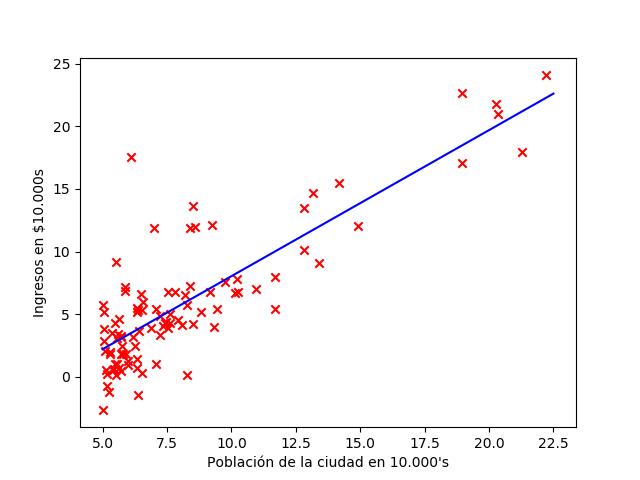

El valor óptimo de theta es [-3.636063475479501, 1.1669891581648786]


In [6]:
plt.figure()
plt.scatter(x[1,:],y, marker='x', c='red')
lineX = np.linspace(5., 22.5, 1000)
lineY = t[0]+t[1]*lineX
plt.plot(lineX, lineY, '-', c='blue')
plt.xlabel('Población de la ciudad en 10.000\'s')
plt.ylabel('Ingresos en $10.000s')
plt.show()

print('El valor óptimo de theta es '+ str(t))

Visualización de la función de coste $J(\theta)$

In [ ]:
####################
# 3D visualization #
####################
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

# Make data.
X = np.linspace(-10, 10, 1000)
Y = np.linspace(-1,4, 1000)
X, Y = np.meshgrid(X, Y)
########
sol = np.empty([1000, 1000])
for n in range(1000):
    sol[n] = J(np.vstack([X[0],Y[n]]))
#sol = np.array(map(lambda i: J(np.vstack([X[0],Y[i]])), range(1000)))
#sol = J(np.vstack([X[0],Y[:]]))
########
Z = sol
#Z = J(X,Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
##################
# Contour curves #
##################
fig, ax = plt.subplots()
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
CS = ax.contour(X, Y, Z, np.logspace(-2, 3, 20))
ax.plot(t[0],t[1], marker='x', c='red')
plt.show()

## 2. Regresión con varias variables

Aplicar el método de regresión lineal sobre los datos del archivo `ex1data2.csv` que contienen datos sobre el precio de casas vendidas en Portland, Oregon, incluyendo para cada casa el tamaño en pies cuadrados, el número de
habitaciones y el precio.

In [7]:
data2 = np.genfromtxt('ex1data2.csv', delimiter=',')
X = data2[:,:-1]
Y = data2[:,-1]

Como el rango de los distintos atributos es muy diferente es necesario normalizar los atributos, sustituyendo cada
valor por el cociente entre su diferencia con la media y la desviación estándar de ese atributo en
los ejemplos de entrenamiento.

In [8]:
def normalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = (X-mu)/sigma
    return (X_norm, mu, sigma)

Aplicar el método de descenso de gradiente a los datos normalizados para obtener el valor de
los parámetros $\theta$ que minimizan la función de coste. Es conveniente realizar una implementación
vectorizada de la función de coste, de la siguiente forma:
$$J(\theta) = \frac{1}{2m}(X\theta-\overrightarrow{y})^T(X\theta-\overrightarrow{y})$$

In [9]:
def J2(theta, x2=X, y2=Y):
    return (1/(2*len(y2))*np.dot(np.transpose(np.dot(x2,theta) - y2),(np.dot(x2,theta) - y2)))

Experimentar con el efecto de utilizar diferentes valores para la tasa
de aprendizaje y construir una gráfica donde se muestre la evolución de la función de coste $J(\theta)$
a medida que avanza el descenso de gradiente, con distintos valores de tasa de aprendizaje.

<IPython.core.display.Javascript object>


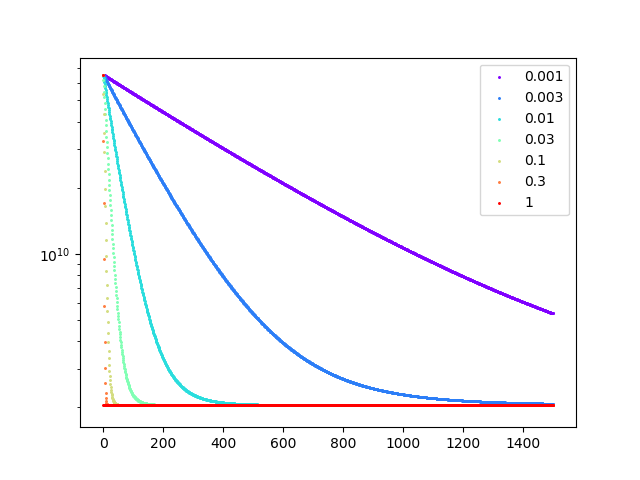

Valores de theta para cada valor de alpha:
5356973277.083732
2078335634.162743
2043282594.9021912
2043280050.602829
2043280050.6028285
2043280050.6028285
2043280050.6028283


In [10]:
T = np.zeros(np.shape(data2)[1])
X = data2[:,:-1]
(X_norm, mu, sigma) = normalize(X)
X_norm = np.hstack([np.ones((len(data2), 1)),X_norm])
coefs = (0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1)
colors = cm.rainbow(np.linspace(0, 1, len(coefs)))
k = 0
plt.figure()
print('Valores de theta para cada valor de alpha:')
for a in coefs:
    alpha = a
    #print(alpha)
    T = np.zeros(np.shape(data2)[1])
    ans = np.empty(1501)
    ans[0] = J2(T, X_norm)
    for n in range(0, 1500):
        update(T, np.transpose(X_norm), Y)
        ans[n+1] = J2(T, X_norm)
    plt.scatter(range(0,1501), ans, marker='.', c=colors[k], s=5 ,label = str(alpha))
    plt.legend(str(alpha))
    k = k+1
    print(J2(T,X_norm))

plt.gca().set_yscale('log')
plt.legend()
plt.show() 

Resolver de nuevo el problema utilizando el método de la _ecuación normal_
que obtiene en un sólo paso el valor óptimo para $\theta$ con la expresión:
$$\theta = \left(X^T X\right)^{-1}X^T\overrightarrow{y}$$

In [11]:
X = np.hstack([np.ones((len(data2), 1)),data2[:,:-1]])
theta = np.matmul(np.matmul(np.linalg.pinv((np.matmul(np.transpose(X),X))),np.transpose(X)), Y)
print(theta)
print(T)

[89597.90954361   139.21067402 -8738.01911255]
[340412.65957447 109447.79646964  -6578.35485416]


Demostrar que los cálculos previos son correctos comprobando que el modelo obtenido
con descenso de gradiente hace las mismas predicciones que el que resulta de la ecuación normal,
aplicándolo por ejemplo a una casa con una superficie de 1.650 pies cuadrados y 3 habitaciones.

In [12]:
new = [1, (1650-mu[0])/sigma[0] , (3-mu[1])/sigma[1]]
my_pred = h(T, new)
norm_pred = h(theta, [1, 1650, 3])
print(norm_pred-my_pred)

9.307404980063438e-08
